In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [2]:
import statsmodels.api as sm

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [10]:
from ISLP import load_data 
from ISLP.models import(ModelSpec as MS, summarize,poly)

In [12]:
dir() #доступ к прсотранству имен

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '_11',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [15]:
A = np.array([3,5,11])

In [16]:
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [18]:
A.size

3

In [20]:
A.sum()

np.int64(19)

In [21]:
Boston = load_data("Boston")

In [22]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [23]:
Boston?

Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        c:\cond\envs\islp_env\lib\site-packages\pandas\core\frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. Th

In [24]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'lstat': Boston['lstat']})

In [25]:
Boston.shape[0]

506

In [26]:
Boston['lstat']

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: lstat, Length: 506, dtype: float64

In [27]:
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [32]:
y = Boston['medv']
model = sm.OLS(y, X) #НМК
results = model.fit() # OLS не осуществляет подгонку моедели

In [33]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [35]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 30 May 2025   Prob (F-statistic):           5.08e-88
Time:                        19:17:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [38]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [39]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [40]:
new_predictions.conf_int(alpha=0.05)# доверительный интервал ("Каков средний вес всех 10-летних детей?")

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [41]:
new_predictions.conf_int(obs=True, alpha=0.05) #интервал предсказаний ("Сколько будет весить конкретный случайный 10-летний ребёнок?")

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [46]:
def abline(ax, b,m, *args, **kwargs):
    "Добавление линии с углом наклона m и свободным членом b на ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m*xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

C:\Users\Никита\AppData\Local\Temp\ipykernel_29660\2616703611.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\Никита\AppData\Local\Temp\ipykernel_29660\2616703611.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


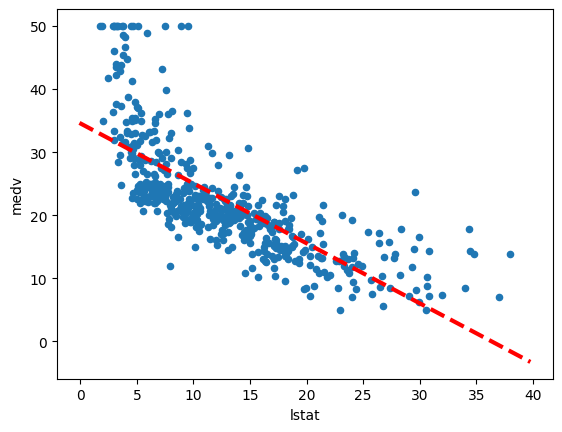

In [47]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
results.params[0],
results.params[1],
'r--',
linewidth=3)

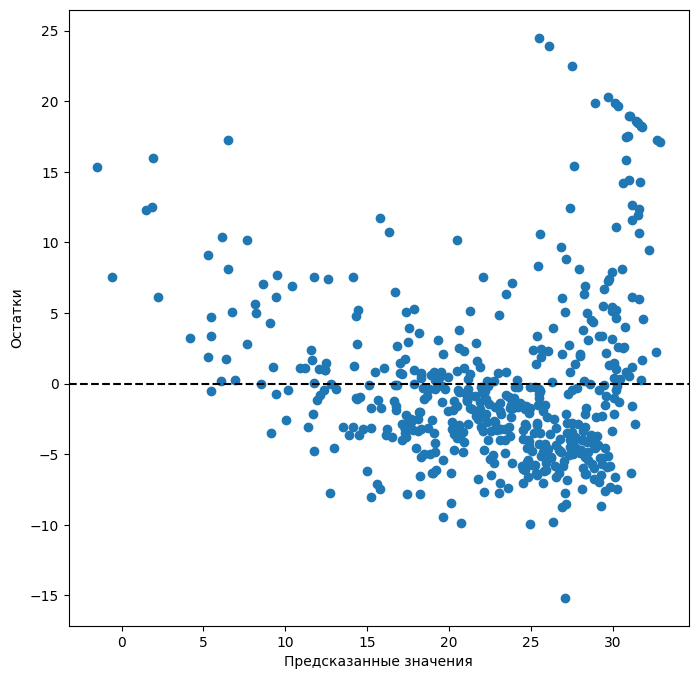

In [48]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Предсказанные значения')
ax.set_ylabel('Остатки')
ax.axhline(0, c='k', ls='--');

np.int64(374)

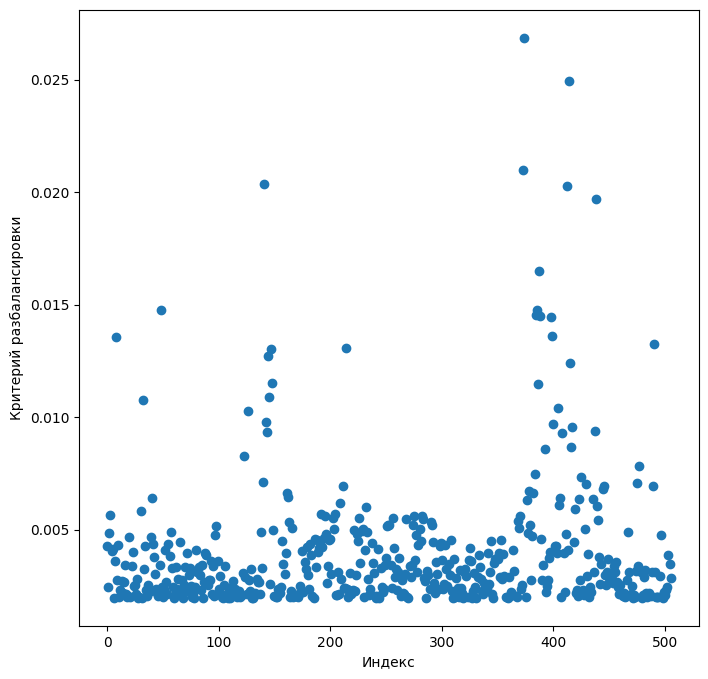

In [49]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Индекс')
ax.set_ylabel('Критерий разбалансировки')
np.argmax(infl.hat_matrix_diag)

### Множественная линейная регрессия

In [50]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [51]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [52]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [53]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [54]:
vals = [VIF(X, i)
for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [55]:
X = MS(['lstat',
'age',
('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [56]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)


,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [57]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


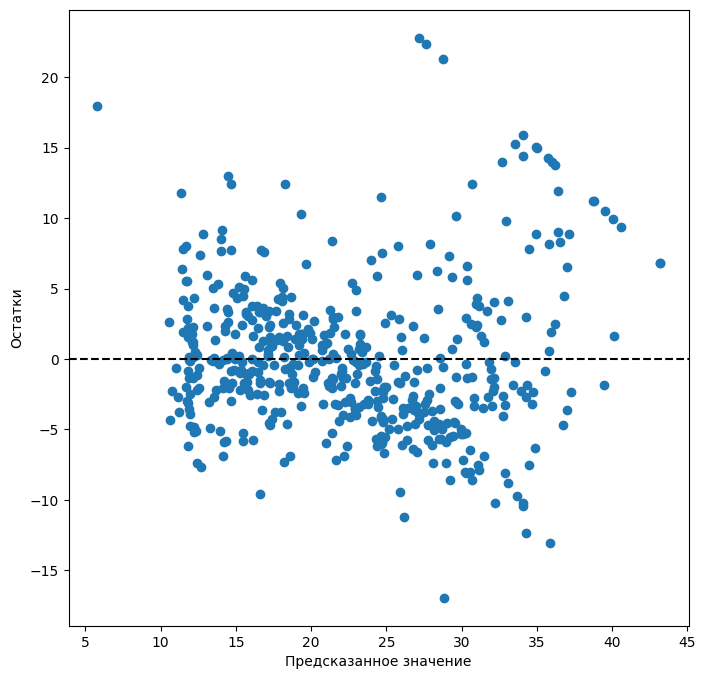

In [58]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Предсказанное значение')
ax.set_ylabel('Остатки')
ax.axhline(0, c='k', ls='--')

In [60]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [61]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


# Упражнения

## Теоретические

1) В чем состоит нулевая гипотеза, для которой p-значения приведены в табл. 3.4? Какие выводы можно сделать по представленным p-значениям?
Постройте свое объяснение на основе терминов sales, TV, radio и newspaper, а не в терминологии коэффициентов линейной модели.

Нулевая гипотеза состоит в том, что между Xi и y нет связи, тоесть равен ли xi нулю .Или что определенное СМИ не оказывает эффект на продажи. Вывода таковы, что Newspaper слабо влияет на отлик. Тоесть газеты не сильно влиют на продажи

2) Перечислите все различия между классификацией по методу k-ближайших соседей и регрессией по тому же методу.

Регрессия является параметрической функцией, мы задаем ей определенную форму(линейную, логистическую и тд), а kkn непараметрической.
Линейная регрессия является более интерпретируемой(коэфиценты), чем черный яшик knn
Knn будет лучше описывать нелинейные данные
При небольшом количестве признаков, knn будет работать лучше, но при больших возникает проклятие размерности, в то время как линеная будет выдавать стабильную rse

3) Представьте, что у вас есть набор данных, состоящий из пяти сле-дующих предикторов: X1 = GPA (средний балл успеваемости), X2 =IQ (коэффициент интеллекта), X3 = Level (степень: 1 для колледжа и 0 для старшей общеобразовательной школы), X4 = взаимодействие между GPA и IQ и X5 = взаимодействие между GPA и Level. Откликом будет уровень начальной зарплаты по окончании учебногозаведения (в тысячах долларов). Предположим, что для подгонки
модели мы воспользовались методом наименьших квадратов и получили следующие оценки: βˆ0 = 50, βˆ1 = 20, βˆ2 = 0.07, βˆ3 = 35, βˆ4 = 0.01, βˆ5 = −10.
   ср балл iq   0-школа 1- колледж ср балл и iq  ср балл и level
50 20      0.07 35                 0.01          -10 
95,08 - колледж
70.08 - школа
a) незнаю
b) Предскажите начальную зарплату для выпускника колледжа с IQ, равным 110, и GPA, равным 4.0.

50 + 4.0*20 + 110*0.07 + 35 + 0.01*(110*4)+ -10*(4*1) = 137.1

c)Предскажите начальную зарплату для выпускника колледжа с IQ, равным 110, и GPA, равным 4.0.
Правда. Ведь коэфицент это угол наклона графика а значит при низком коэфиценте гарфки поднимается не сильно


4)Мы собрали набор данных из n = 100 наблюдений, состоящий из одного предиктора и одного количественного отклика. После этого мы выполнили отдельно подгонку линейной регрессионной модели к нашим данным и кубической регрессии, т. е. Y = β0 + β1X + β2X2 +β3X3 + ϵ.
a)Да rss будет отличаться. У простая линеная регрессия. А мы еще добовляем полиномиальные признаки которые повторяют шумы. Из за этого наш график будет скакать(возможно переобучение)
b)на контрольных даннх rss тоже будет отличаться. Полиномиальная моедль будет скорее всего переобучена и у нее будет высокая дисперсия.
c)Тут простая линейная регресия проиграет у нее слишком высокое смещение(простая моедль)
d)Точно такойже ответ

5) ai пердставялет собой угол наклона. Так можно написать без свободного члена я думаю в определенных ситуациях
6) Используя (3.4), докажите, что в случае с простой линейной регрес-
сией линия наименьших квадратов всегда будет проходить через
точку (x ср , yср)
Я взял коориданты (3,1) (3,5) (5,2) получил график y = 4.497 - 0.49X. При x 1.7 прошел через средний X


In [62]:
50 + 4.0*20 + 110*0.07 + 35 + 0.01*(110*4)+ -10*(4*1)

137.1